### KNN (K-Nearest Neighbors)

In [1]:
!pip install mglearn
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.9 MB/s eta 0:00:00:00:010:01


In [6]:
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
df = pd.read_excel('../input/raisin-dataset/Raisin_Dataset/Raisin_Dataset.xlsx')

In [7]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [8]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분리 (6:4)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [9]:
# 기본 K-nn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors = 3, 
                                  weights='uniform', 
                                  metric="minkowski")
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.9111111111111111
0.8305555555555556


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

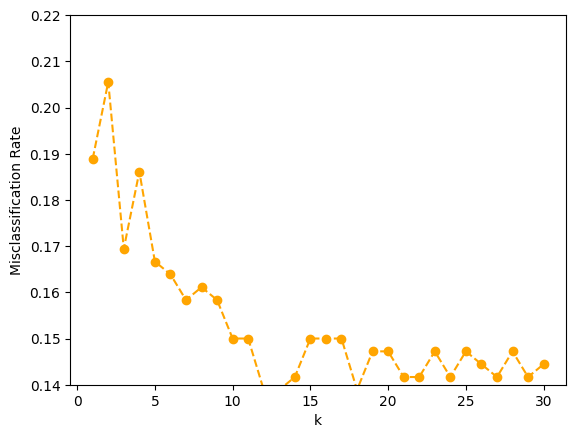

In [10]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

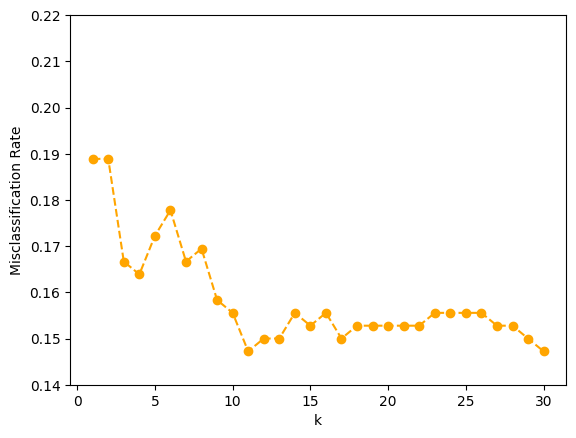

In [11]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

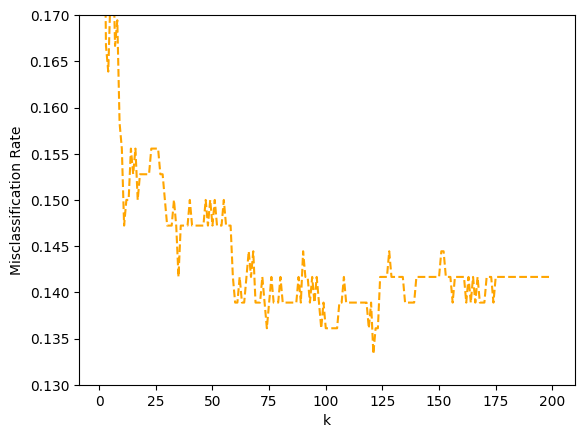

In [12]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

In [13]:
# 시각화를 위한 차원 축소

# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,-0.014734,-0.225986
1,-0.335061,-0.027691
2,0.664426,0.376272
3,-0.014311,0.080911
4,-0.053857,0.178877


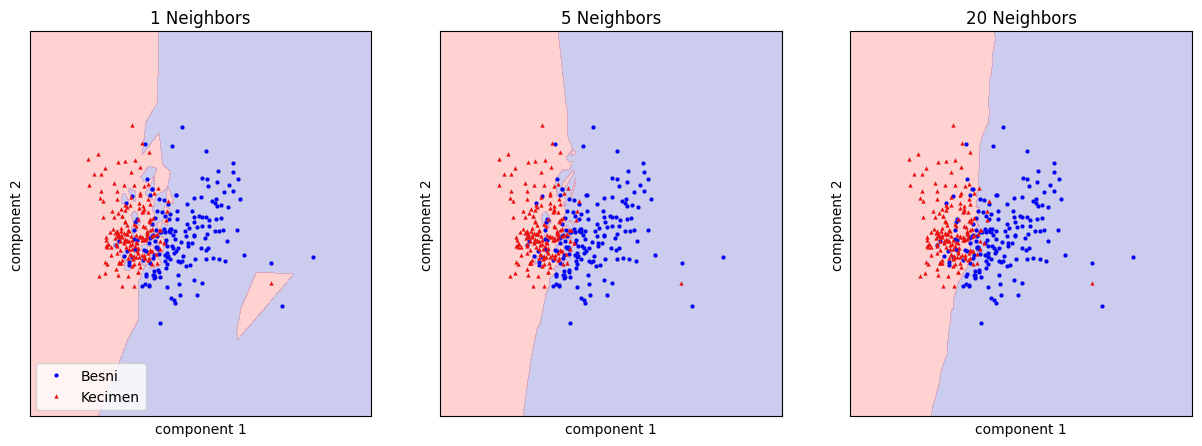

In [14]:
# 결정 경계선(decision boundary) 시각화 확인

# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 이웃 수 1, 5, 20에 따른 결정곙계 시각화
for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x, 
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1], 
                             df_vsl_y, markeredgewidth=0.1, 
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)